# Keras Feedforward 2 - lab (solutions)

In [60]:
import numpy as np
import pandas as pd
from tensorflow.keras import models, layers, Input, Model
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import plot_model
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [61]:
def plot_loss(history):
    """ Plot training, test loss. """
    
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'])
    plt.show();

### Read and preprocess the data.

In [62]:
X,y = make_regression(n_samples=5000, n_features=5, n_informative=5, noise=2)

Train/test split, then scale the predictors.

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [64]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Sanity check.

In [65]:
print(X_train.shape)
print(y_train.shape)

(3750, 5)
(3750,)


### Logistic regression with a neural net

In [66]:
# delete any old models
K.clear_session()

Build and compile the model.  Note that there is no activation in the final layer.

In [67]:
input_size = X.shape[1]
model = models.Sequential()
model.add(Input(shape=(input_size,)))
model.add(layers.Dense(1))

In [54]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [74]:
opt = SGD(learning_rate=0.01)
model.compile(optimizer=opt, loss='mse', metrics=['mae'])

Train the model.

In [75]:
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.3)

Epoch 1/10
83/83 [==============================] - 1s 3ms/step - loss: 264.9634 - mae: 11.5970 - val_loss: 38.2098 - val_mae: 4.9696
Epoch 2/10
83/83 [==============================] - 0s 2ms/step - loss: 14.6220 - mae: 2.9100 - val_loss: 5.5984 - val_mae: 1.8946
Epoch 3/10
83/83 [==============================] - 0s 2ms/step - loss: 4.3844 - mae: 1.6705 - val_loss: 4.3173 - val_mae: 1.6547
Epoch 4/10
83/83 [==============================] - 0s 2ms/step - loss: 3.9671 - mae: 1.5968 - val_loss: 4.2682 - val_mae: 1.6435
Epoch 5/10
83/83 [==============================] - 0s 2ms/step - loss: 3.9546 - mae: 1.5963 - val_loss: 4.2642 - val_mae: 1.6421
Epoch 6/10
83/83 [==============================] - 0s 2ms/step - loss: 3.9534 - mae: 1.5950 - val_loss: 4.2575 - val_mae: 1.6446
Epoch 7/10
83/83 [==============================] - 0s 2ms/step - loss: 3.9585 - mae: 1.5957 - val_loss: 4.2708 - val_mae: 1.6443
Epoch 8/10
83/83 [==============================] - 0s 2ms/step - loss: 3.9544 - mae:

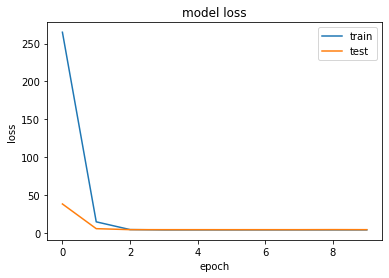

In [76]:
plot_loss(history)

Compute RMSE and MAE

In [77]:
y_pred = model.predict(X_test)[:,0]
print('test RMSE with neural net: {:.3f}'.format(np.sqrt(((y_pred - y_test)**2).mean())))
print('test MAE with neural net: {:.3f}'.format(np.abs(y_pred - y_test).mean()))

test RMSE with neural net: 2.028
test MAE with neural net: 1.623


### Linear regression with Scikit-Learn.

In [78]:
regr = LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
print('test RMSE with Scikit-Learn: {:.3f}'.format(np.sqrt(((y_pred - y_test)**2).mean())))

test RMSE with Scikit-Learn: 2.024


### Play with number of epochs in neural net.

In [ ]:
model.set_weights(weights)
history = model.fit(X_train, y_train, batch_size=32, epochs=5, validation_split=0.3)

Epoch 1/5
535/535 [==============================] - 1s 2ms/step - loss: 0.7031 - accuracy: 0.6304 - val_loss: 0.4829 - val_accuracy: 0.7996
Epoch 2/5
535/535 [==============================] - 1s 2ms/step - loss: 0.4401 - accuracy: 0.8072 - val_loss: 0.4132 - val_accuracy: 0.8187
Epoch 3/5
535/535 [==============================] - 1s 1ms/step - loss: 0.4044 - accuracy: 0.8172 - val_loss: 0.3941 - val_accuracy: 0.8195
Epoch 4/5
535/535 [==============================] - 1s 2ms/step - loss: 0.3924 - accuracy: 0.8179 - val_loss: 0.3861 - val_accuracy: 0.8215
Epoch 5/5
535/535 [==============================] - 1s 1ms/step - loss: 0.3868 - accuracy: 0.8181 - val_loss: 0.3819 - val_accuracy: 0.8210


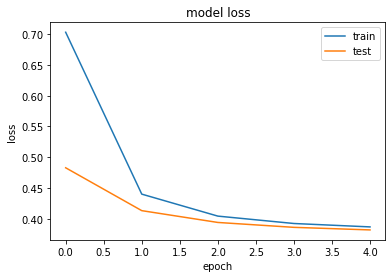

In [ ]:
plot_loss(history)

### A classifier with a single hidden layer of 10 neurons.  ReLU activation function.

In [ ]:
model = models.Sequential()
model.add(Input(shape=(input_size,)))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                130       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


During training, validation accuracy seems to stop improving, but validation loss keeps improving.  

In [ ]:
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.3)

Epoch 1/10
535/535 [==============================] - 1s 2ms/step - loss: 0.4764 - accuracy: 0.7494 - val_loss: 0.4307 - val_accuracy: 0.7806
Epoch 2/10
535/535 [==============================] - 1s 2ms/step - loss: 0.4170 - accuracy: 0.7973 - val_loss: 0.4032 - val_accuracy: 0.8130
Epoch 3/10
535/535 [==============================] - 1s 2ms/step - loss: 0.3970 - accuracy: 0.8083 - val_loss: 0.3911 - val_accuracy: 0.8101
Epoch 4/10
535/535 [==============================] - 1s 2ms/step - loss: 0.3875 - accuracy: 0.8096 - val_loss: 0.3849 - val_accuracy: 0.8133
Epoch 5/10
535/535 [==============================] - 1s 2ms/step - loss: 0.3822 - accuracy: 0.8136 - val_loss: 0.3809 - val_accuracy: 0.8213
Epoch 6/10
535/535 [==============================] - 1s 2ms/step - loss: 0.3789 - accuracy: 0.8170 - val_loss: 0.3784 - val_accuracy: 0.8236
Epoch 7/10
535/535 [==============================] - 1s 2ms/step - loss: 0.3766 - accuracy: 0.8208 - val_loss: 0.3764 - val_accuracy: 0.8246
Epoch 

Notice how the plot is a little different from before.

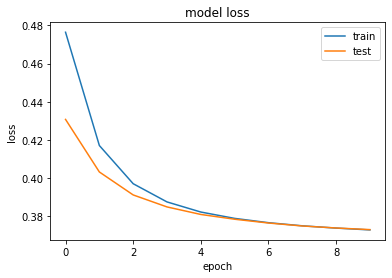

In [ ]:
plot_loss(history)

In [ ]:
y_pred = (model.predict(X_test)[:,0] > 0.5).astype(int)
print('test accuracy with neural net: {:.3f}'.format((y_pred == y_test).mean()))

test accuracy with neural net: 0.828


### Play with batch size

In [ ]:
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=16, epochs=5, validation_split=0.3)

Epoch 1/5
1069/1069 [==============================] - 2s 2ms/step - loss: 0.3719 - accuracy: 0.8226 - val_loss: 0.3716 - val_accuracy: 0.8268
Epoch 2/5
1069/1069 [==============================] - 2s 2ms/step - loss: 0.3707 - accuracy: 0.8239 - val_loss: 0.3707 - val_accuracy: 0.8268
Epoch 3/5
1069/1069 [==============================] - 2s 2ms/step - loss: 0.3699 - accuracy: 0.8238 - val_loss: 0.3701 - val_accuracy: 0.8280
Epoch 4/5
1069/1069 [==============================] - 2s 2ms/step - loss: 0.3691 - accuracy: 0.8234 - val_loss: 0.3698 - val_accuracy: 0.8271
Epoch 5/5
1069/1069 [==============================] - 2s 2ms/step - loss: 0.3686 - accuracy: 0.8246 - val_loss: 0.3696 - val_accuracy: 0.8286


In [ ]:
y_pred = model.predict(X_test)[:,0]
print('test RMSE with neural net: {:.3f}'.format(np.sqrt(((y_pred - y_test)**2).mean())))
print('test MAE with neural net: {:.3f}'.format(np.abs(y_pred - y_test).mean()))

test accuracy with neural net: 0.827


### A hidden layer of 50 neurons.

In [ ]:
model = models.Sequential()
model.add(Input(shape=(input_size,)))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.3)

Epoch 1/10
535/535 [==============================] - 1s 2ms/step - loss: 0.4741 - accuracy: 0.7673 - val_loss: 0.4009 - val_accuracy: 0.8215
Epoch 2/10
535/535 [==============================] - 1s 2ms/step - loss: 0.3899 - accuracy: 0.8176 - val_loss: 0.3787 - val_accuracy: 0.8231
Epoch 3/10
535/535 [==============================] - 1s 2ms/step - loss: 0.3779 - accuracy: 0.8186 - val_loss: 0.3732 - val_accuracy: 0.8242
Epoch 4/10
535/535 [==============================] - 1s 2ms/step - loss: 0.3739 - accuracy: 0.8194 - val_loss: 0.3710 - val_accuracy: 0.8239
Epoch 5/10
535/535 [==============================] - 1s 2ms/step - loss: 0.3717 - accuracy: 0.8205 - val_loss: 0.3695 - val_accuracy: 0.8256
Epoch 6/10
535/535 [==============================] - 1s 2ms/step - loss: 0.3704 - accuracy: 0.8204 - val_loss: 0.3683 - val_accuracy: 0.8272
Epoch 7/10
535/535 [==============================] - 1s 2ms/step - loss: 0.3692 - accuracy: 0.8208 - val_loss: 0.3675 - val_accuracy: 0.8254
Epoch 

In [ ]:
y_pred = model.predict(X_test)[:,0]
print('test RMSE with neural net: {:.3f}'.format(np.sqrt(((y_pred - y_test)**2).mean())))
print('test MAE with neural net: {:.3f}'.format(np.abs(y_pred - y_test).mean()))

test accuracy with neural net: 0.828


### Two hidden layers of 20 neurons each

In [ ]:
model = models.Sequential()
model.add(Input(shape=(input_size,)))
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.3)

Epoch 1/10
535/535 [==============================] - 1s 2ms/step - loss: 0.5056 - accuracy: 0.7582 - val_loss: 0.4249 - val_accuracy: 0.7913
Epoch 2/10
535/535 [==============================] - 1s 2ms/step - loss: 0.4009 - accuracy: 0.8104 - val_loss: 0.3829 - val_accuracy: 0.8223
Epoch 3/10
535/535 [==============================] - 1s 2ms/step - loss: 0.3781 - accuracy: 0.8198 - val_loss: 0.3741 - val_accuracy: 0.8253
Epoch 4/10
535/535 [==============================] - 1s 2ms/step - loss: 0.3728 - accuracy: 0.8218 - val_loss: 0.3715 - val_accuracy: 0.8246
Epoch 5/10
535/535 [==============================] - 1s 2ms/step - loss: 0.3708 - accuracy: 0.8219 - val_loss: 0.3699 - val_accuracy: 0.8257
Epoch 6/10
535/535 [==============================] - 1s 2ms/step - loss: 0.3695 - accuracy: 0.8227 - val_loss: 0.3689 - val_accuracy: 0.8271
Epoch 7/10
535/535 [==============================] - 1s 2ms/step - loss: 0.3686 - accuracy: 0.8239 - val_loss: 0.3680 - val_accuracy: 0.8269
Epoch 

In [ ]:
y_pred = model.predict(X_test)[:,0]
print('test RMSE with neural net: {:.3f}'.format(np.sqrt(((y_pred - y_test)**2).mean())))
print('test MAE with neural net: {:.3f}'.format(np.abs(y_pred - y_test).mean()))

test accuracy with neural net: 0.827
